<a href="https://colab.research.google.com/github/DevanshPandya19/Python_Project/blob/main/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
hr_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Identify and treat the missing and illogical values.

In [7]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
#print number of variables and entries in the data
print("There are", hr_data.shape[1],"variables and",hr_data.shape[0],"entries in the data")
#check for missing values
print("Number of missing values for every variables:")
print(hr_data.isnull().sum())

There are 35 variables and 1470 entries in the data
Number of missing values for every variables:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
Wo

In [6]:
#check for duplicate values
hr_data.duplicated().sum()

0

In [7]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Explore the relationship between the explanatory variables and the target variables.

In [8]:
#get Categorical variable names
categorical_names = hr_data.select_dtypes(include=[np.object]).columns.tolist()
categorical_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [9]:
def generate_Categorical_variable_graph(var_name):
    temp_df = hr_data.groupby(var_name)['Attrition'].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('Percent').reset_index()
    plt = sns.catplot(x=var_name, y='Percent', hue="Attrition", kind='bar', data=temp_df, palette="pastel")
    plt.ax.set_ylim(0,100)
    plt.ax.set_xticklabels(plt.ax.get_xticklabels(), rotation=20, ha="right")
    
    for p in plt.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()+2
        plt.ax.text(txt_x,txt_y,txt)
     
    

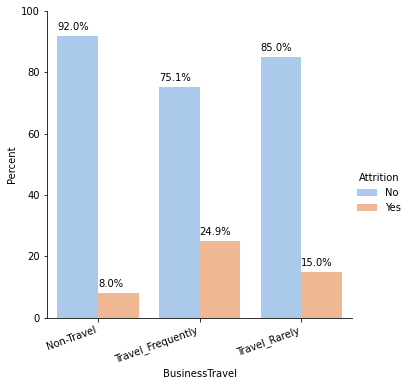

In [10]:
generate_Categorical_variable_graph('BusinessTravel')

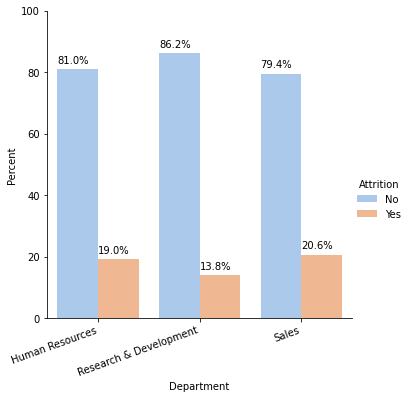

In [11]:
generate_Categorical_variable_graph('Department')

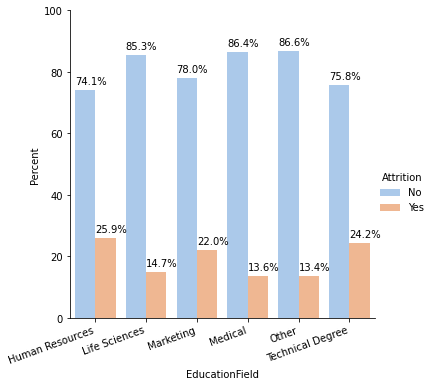

In [12]:
generate_Categorical_variable_graph('EducationField')

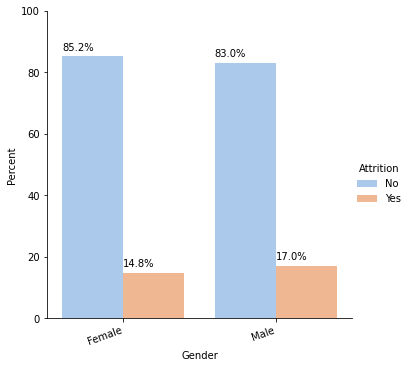

In [13]:
generate_Categorical_variable_graph('Gender')

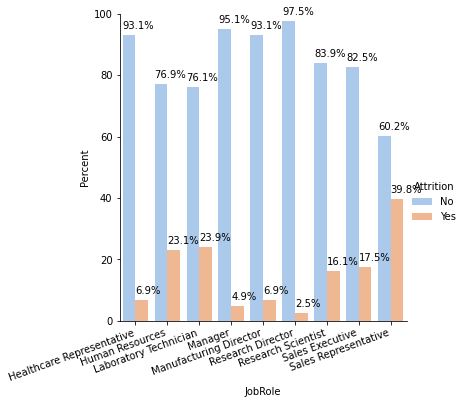

In [14]:
generate_Categorical_variable_graph('JobRole')

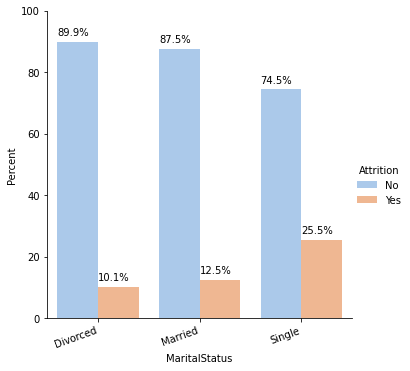

In [15]:
generate_Categorical_variable_graph('MaritalStatus')

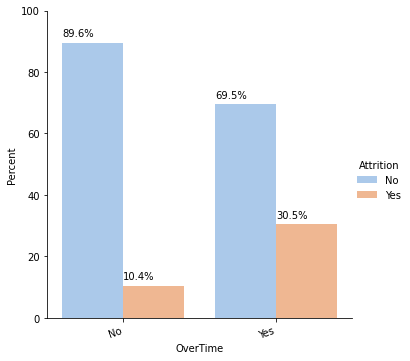

In [16]:
generate_Categorical_variable_graph('OverTime')

In [17]:
#get  Numerical variable names
Numerical_names = hr_data.select_dtypes([np.number]).columns.tolist()
Numerical_names

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab2bf8f410>,
      dtype=object)

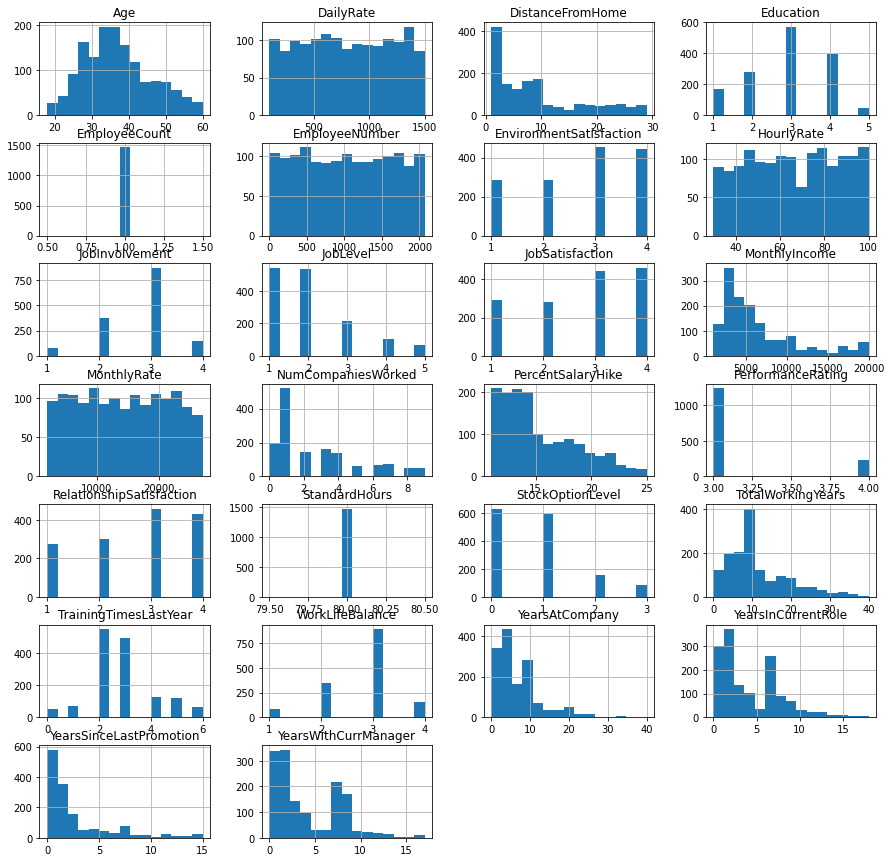

In [18]:
hr_data[Numerical_names].hist(bins=15, figsize=(15, 15), layout=(7, 4))

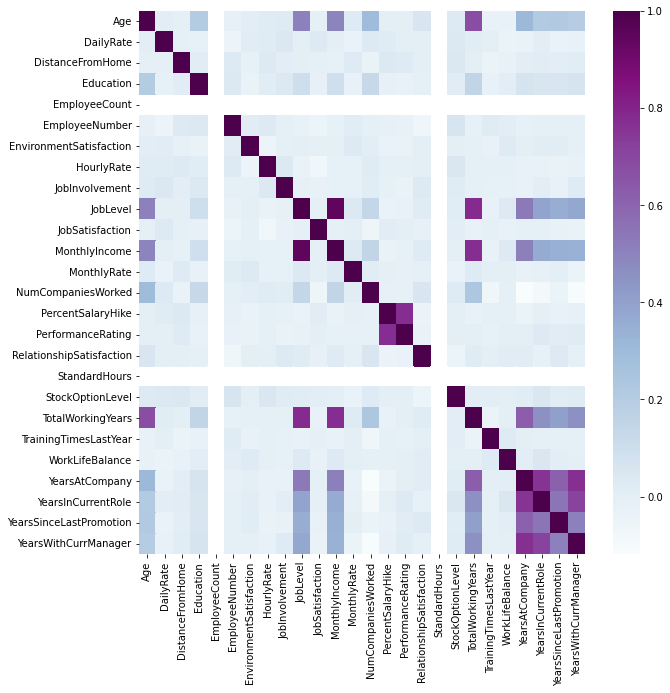

In [19]:
#correlation matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(hr_data.corr(), ax=ax, cmap="BuPu")
plt.savefig("Plotting_Correlation_HeatMap.jpg")

Observation from above matrix

Most of the values are less related to each other

Hourly rate, daily rate, and monthly rate are unrealted with eachother which is invalid so we will consider monthlyIncome for the model because it is most related with job level

TotalWorkingYears is more related to Job Level which indicates that you can achive higher job level if you work longer in the company

Number of companies an employee have worked at is less related with the TotalWorkingYears which indecates that he/she might leave

Perfomance rating is heighly related with percentsalaryhike that means one can get more salary hike with higher perfomance rating



# Study Target Data

In [20]:
# Reassign target
hr_data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Explore the feature selection and dimensionality reduction.

In [22]:
#numerical features description
dataframe=hr_data.describe()
print(dataframe)
smalldata = dataframe[["EmployeeCount","EmployeeNumber","StandardHours"]]

print(smalldata)
#import dataframe_image as dfi
#dfi.export(smalldata, 'dataframe1.png')

               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1

Here, as we observe The __EmployeeConut__ have only one value(1) that will not help in the prediction model so we can remove this variable

__EmployeeNumber__ repersents unique identity of the employee that doesn't have any significance in the attrition so we can also remove this variable

__StandardHours__ also has only one value(80) so we can also remove this variable

In [23]:
hr_data.describe()#categorical features description
hr_data.describe(include=[np.object])
#dfi.export(hr_data.describe(include=[np.object]), 'dataframe2.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


__over18__ has only one unique value that means all the employees are over the age of 18 and it doesn't help to build the model so we can remove this variable

In [24]:
#Remove useless features
hr_data.drop( ['DailyRate','EmployeeNumber', 'EmployeeCount','HourlyRate','MonthlyRate', 'Over18', 'StandardHours'] , axis = 1, inplace = True )
print(hr_data.shape)


(1470, 28)


# Modeling

Encode the categorical data into numerical as skitlearn takes only numerical values.

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import imblearn

In [26]:
categorical_names = hr_data.select_dtypes(include=[np.object]).columns.tolist()
categorical_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [27]:
hr_data["BusinessTravel"] = LabelEncoder().fit_transform(hr_data['BusinessTravel'])
hr_data["Department"] = LabelEncoder().fit_transform(hr_data['Department'])
hr_data["EducationField"] = LabelEncoder().fit_transform(hr_data['EducationField'])
hr_data["Gender"] = LabelEncoder().fit_transform(hr_data['Gender'])
hr_data["JobRole"] = LabelEncoder().fit_transform(hr_data['JobRole'])
hr_data["MaritalStatus"] = LabelEncoder().fit_transform(hr_data['MaritalStatus'])
hr_data["OverTime"] = LabelEncoder().fit_transform(hr_data['OverTime'])
hr_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,...,3,4,1,6,3,3,2,2,2,2


Split data into train and test dataset

In [29]:
hr_X_train, hr_X_test, hr_Y_train, hr_Y_test = train_test_split(hr_data.drop(['Attrition'],axis=1), hr_data['Attrition'],test_size= 0.30, random_state=60);
print( len(hr_X_train), "train set  and ", len(hr_X_test), "validation set")

1029 train set  and  441 validation set


In [30]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, roc_auc_score, f1_score,precision_recall_curve,ConfusionMatrixDisplay

In [35]:
def model_evaluation(model , X_train , y_train , X_test , y_test):

    model.fit(X_train , y_train)
  

    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:,1]
    print('#'*60)
    model_conf_matrix = confusion_matrix(y_test,y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=model_conf_matrix,display_labels=["0","1"])
    
    
    TP = model_conf_matrix[1][1]; TN = model_conf_matrix[0][0]; 
    FP = model_conf_matrix[0][1]; FN = model_conf_matrix[1][0];
    sensitivity = TP / float(TP + FN) * 100.0; specificity = TN / float(TN + FP) * 100.0;
    precision = TP / float(TP + FP) * 100.0;
    
    
    print('Confusion matrix - Test :', '\n',model_conf_matrix)
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    print('AUC - Test:', roc_auc_score(y_test , y_test_prob))
    print('f1-Score - Train:',f1_score(y_test, y_test_pred, average=None))
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Confusion Matrix")
    disp = disp.plot(ax=ax)
    plt.show()
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.show()
    
    
   

# KNN classifier

############################################################
Confusion matrix - Test : 
 [[353  10]
 [ 72   6]]
Overall Accuracy - Test : 0.8140589569160998
AUC - Test: 0.5853641308186763
f1-Score - Train: [0.89593909 0.12765957]


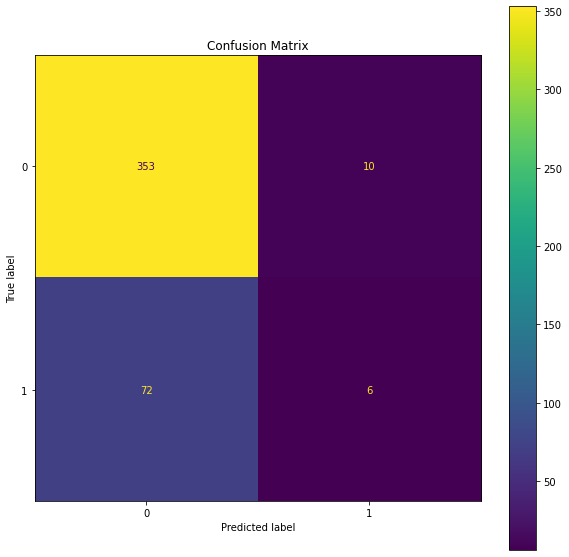

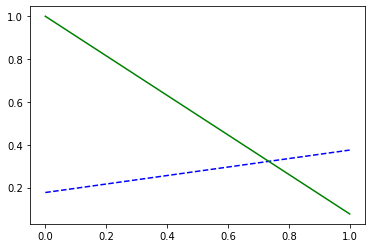

In [36]:
knn = KNeighborsClassifier()
model_evaluation(knn,hr_X_train,hr_Y_train, hr_X_test, hr_Y_test)